In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
qnn, gl, gr    = 3, 1, 3
num_ptcs_range = range(2, 16+1)
c_dataframe    = pd.concat((pd.read_csv(f"csv/classical_9.csv"), pd.read_csv(f"csv/classical_best.csv")))
q_dataframe    = pd.read_csv(f"csv/qnn{qnn}_gl{gl}_gr{gr}_ptc({num_ptcs_range[0]},{num_ptcs_range[-1]})-12.csv")
df = pd.concat((c_dataframe, q_dataframe))
df = df.fillna(0)
df.loc[df["model_name"] == "Classical2PCGNN", "M"] = "C"
df.loc[df["model_name"] == "QuantumRotQCGNN", "M"] = "Q"
df.loc[df["gnn_out"].astype(int) == 1024, "M"] = "B"
df["hue"] = df["M"] + "_" + df["data_mode"]
print(df["hue"].unique())
print(df.columns)
df.tail()

['C_train' 'C_test' 'B_train' 'B_test' 'Q_train' 'Q_test']
Index(['test_acc_epoch', 'test_roc_auc', 'data_mode', 'mode', 'wandb', 'time',
       'device', 'suffix', 'project', 'qdevice', 'diff_method',
       'num_train_ratio', 'num_bin_data', 'batch_size', 'num_workers',
       'max_epochs', 'accelerator', 'fast_dev_run', 'log_every_n_steps',
       'rnd_seed', 'sig', 'bkg', 'abbrev', 'cut', 'bin', 'subjet_radius',
       'num_pt_ptcs', 'data_suffix', 'gnn_in', 'gnn_out', 'gnn_hidden',
       'gnn_layers', 'mlp_hidden', 'mlp_layers', 'lr', 'model_suffix',
       'model_name', 'group_rnd', 'qbackend', 'use_qiskit_enc',
       'gnn_idx_qubits', 'gnn_nn_qubits', 'gnn_reupload', 'M', 'hue'],
      dtype='object')


,test_acc_epoch,test_roc_auc,data_mode,mode,wandb,time,device,suffix,project,qdevice,...,model_suffix,model_name,group_rnd,qbackend,use_qiskit_enc,gnn_idx_qubits,gnn_nn_qubits,gnn_reupload,M,hue
211,0.60000,0.853300,test,ibmq,False,20231214_152056,0.0,0.0,g_main,default.qubit,...,qidx4_qnn3_gl1_gr3,QuantumRotQCGNN,QuantumRotQCGNN_qidx4_qnn3_gl1_gr3 | TT-QCD_cu...,0.0,0.0,4.0,3.0,3.0,Q,Q_test
212,0.54125,0.782906,train,ibmq,False,20231214_152056,0.0,0.0,g_main,default.qubit,...,qidx4_qnn3_gl1_gr3,QuantumRotQCGNN,QuantumRotQCGNN_qidx4_qnn3_gl1_gr3 | BB-QCD_cu...,0.0,0.0,4.0,3.0,3.0,Q,Q_train
213,0.54500,0.851000,test,ibmq,False,20231214_152056,0.0,0.0,g_main,default.qubit,...,qidx4_qnn3_gl1_gr3,QuantumRotQCGNN,QuantumRotQCGNN_qidx4_qnn3_gl1_gr3 | BB-QCD_cu...,0.0,0.0,4.0,3.0,3.0,Q,Q_test
214,0.54500,0.813734,train,ibmq,False,20231214_152056,0.0,0.0,g_main,default.qubit,...,qidx4_qnn3_gl1_gr3,QuantumRotQCGNN,QuantumRotQCGNN_qidx4_qnn3_gl1_gr3 | TT-QCD_cu...,0.0,0.0,4.0,3.0,3.0,Q,Q_train
215,0.57000,0.853000,test,ibmq,False,20231214_152056,0.0,0.0,g_main,default.qubit,...,qidx4_qnn3_gl1_gr3,QuantumRotQCGNN,QuantumRotQCGNN_qidx4_qnn3_gl1_gr3 | TT-QCD_cu...,0.0,0.0,4.0,3.0,3.0,Q,Q_test


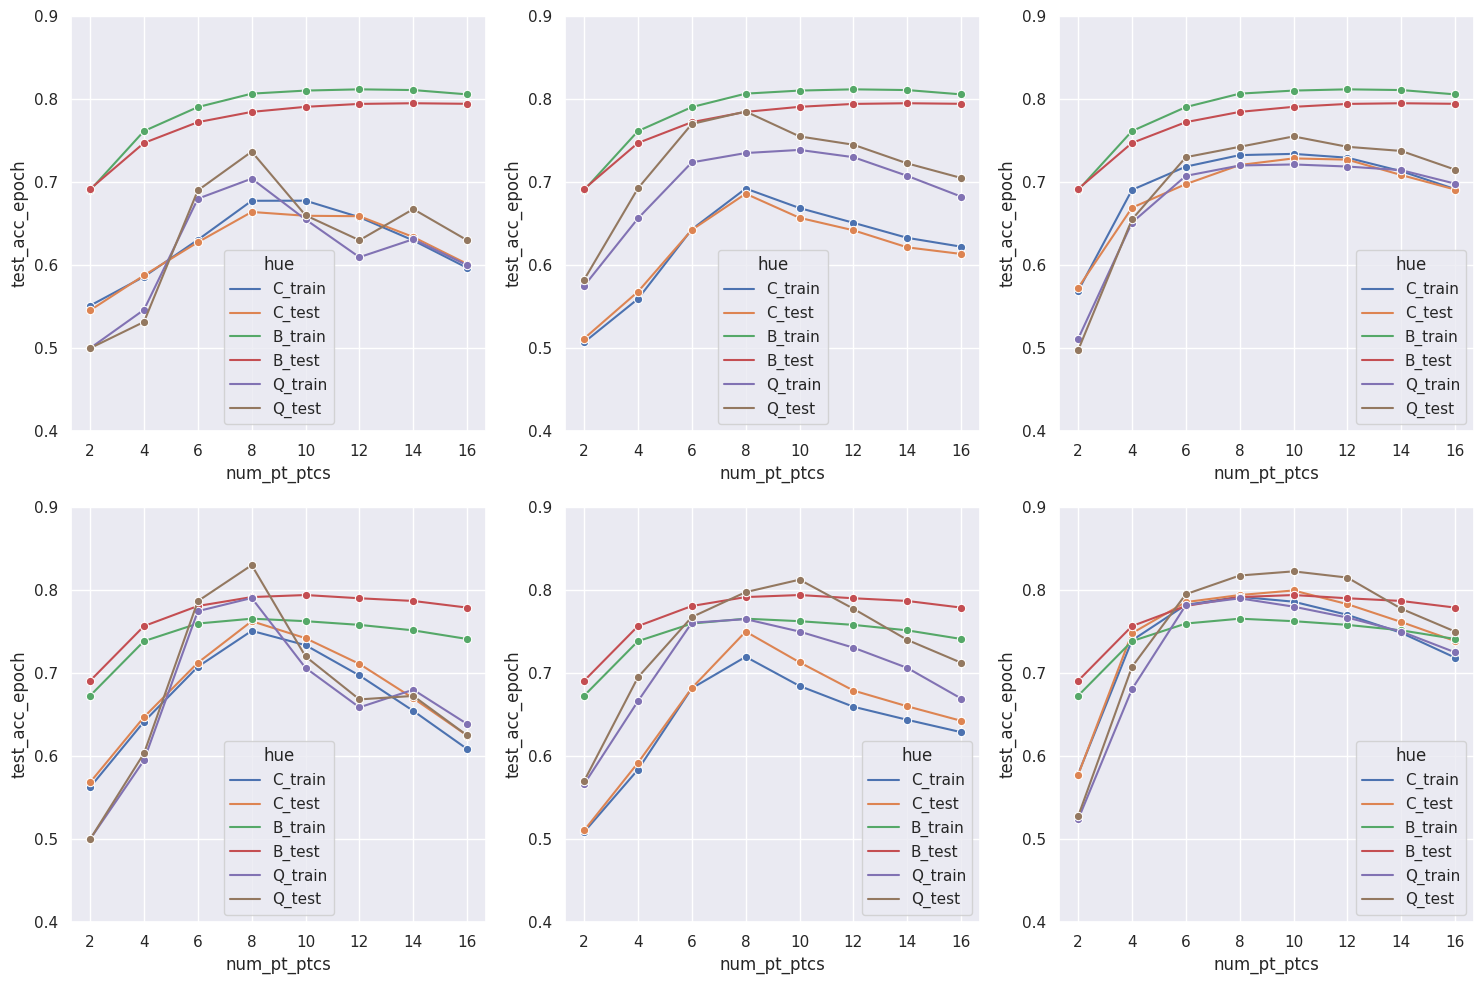

In [3]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
for i in range(3):
    idx = (df["gnn_out"].astype(int) == 3*(i+1)) | (df["gnn_nn_qubits"].astype(int) == 3*(i+1))
    idx = idx | (df["M"] ==  "B")
    ax[0][i].set_ylim(0.4, 0.9)
    ax[1][i].set_ylim(0.4, 0.9)
    sns.lineplot(df[idx & (df["abbrev"]=="BB-QCD")], ax=ax[0][i], x="num_pt_ptcs", y="test_acc_epoch", hue="hue", errorbar=None, marker="o")
    sns.lineplot(df[idx & (df["abbrev"]=="TT-QCD")], ax=ax[1][i], x="num_pt_ptcs", y="test_acc_epoch", hue="hue", errorbar=None, marker="o")
    # sns.barplot(df[idx & (df["abbrev"]=="BB-QCD")], ax=ax[0][i], x="num_pt_ptcs", y="test_acc_epoch", hue="hue", errorbar=None)
    # sns.barplot(df[idx & (df["abbrev"]=="TT-QCD")], ax=ax[1][i], x="num_pt_ptcs", y="test_acc_epoch", hue="hue", errorbar=None)
plt.tight_layout()